In [1]:
import numpy as np
import pandas as pd
import xgboost as xb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [6]:
breast_cancer_data = load_breast_cancer()
data = breast_cancer_data.data
target = breast_cancer_data.target

data = pd.DataFrame(data, columns=breast_cancer_data.feature_names)
X = data[:]
data['target'] = target
y = data['target']

# XGBoost Implementation

In [7]:
from sklearn.model_selection import train_test_split

xb_cls = xb.XGBClassifier(learning_rate=0.1, n_estimators=100, objective='binary:logistic', random_state=101)
trainX, testX, trainY, testY = train_test_split(X,y)

model = xb_cls.fit(trainX, trainY)


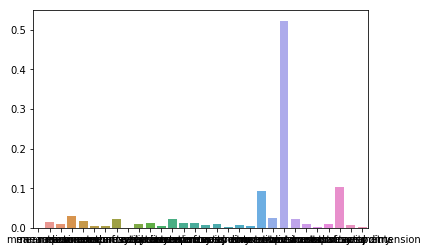

In [8]:
import seaborn as sb

feature_imp = model.feature_importances_
sb.barplot(breast_cancer_data.feature_names, feature_imp, orient='v')

In [10]:
predictedY = model.predict(testX)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

acs = accuracy_score(testY, predictedY)
print (acs)


cm = confusion_matrix(testY, predictedY)
print (cm)

0.965034965034965
[[44  1]
 [ 4 94]]


# XGBoost Cross validation

In [11]:
dMatrix = xb.DMatrix(data=X, label=y)
params = {"objective":"binary:logistic"}

cv_results = xb.cv(params=params, dtrain=dMatrix, nfold=5, num_boost_round=20, metrics='error', as_pandas=True)

C:\MachineLearning\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\MachineLearning\anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [13]:
accuracy = 1 - cv_results['test-error-std']
print (accuracy.iloc[-1])
print (accuracy[19])

0.9805016826879857
0.9805016826879857
